## this should go to the docs/test for metric module)

See [this](https://github.com/jbusecke/cmip6_preprocessing/issues/17) issue for details. 

In [36]:
import pandas as pd
# get all available ocean models from the cloud. 
url = 'https://storage.googleapis.com/cmip6/pangeo-cmip6.csv'
df = pd.read_csv(url)
df_ocean =df[(df.table_id=='Omon') + (df.table_id=='Oyr')]
ocean_models = df_ocean.source_id.unique()
print(ocean_models)
print(len(ocean_models))

exclude_variables = ['mlotst', 'msftmz', 'intpp'] # at the moment cmip6_pp does not like fields that have only one spatial dimension


# get one dataset from each model, shouldnt matter which
col = intake.open_esm_datastore("https://raw.githubusercontent.com/NCAR/intake-esm-datastore/master/catalogs/pangeo-cmip6.json")
# cat = col.search(source_id=ocean_models)
cat = col.search(table_id=['Omon', 'Oyr'])
exclude_index = [vid not in exclude_variables for vid in cat.df['variable_id']]
cat.df = cat.df[exclude_index]
cat.df = cat.df.drop_duplicates(subset='source_id')
print(len(cat.df))
data_dict_raw = cat.to_dataset_dict(zarr_kwargs={'consolidated': True, 'decode_times':False},
                                preprocess=combined_preprocessing)
data_dict = parse_metrics(data_dict_raw, col, preprocess=combined_preprocessing)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  op=op_str, alt_op=unsupported[op_str]


['BCC-ESM1' 'BCC-CSM2-MR' 'CanESM5' 'CNRM-ESM2-1' 'ACCESS-ESM1-5'
 'E3SM-1-1-ECA' 'E3SM-1-1' 'IPSL-CM6A-LR' 'MIROC-ES2L' 'UKESM1-0-LL'
 'GISS-E2-1-G' 'CESM2' 'GFDL-ESM4' 'AWI-CM-1-1-MR' 'CAMS-CSM1-0'
 'FGOALS-f3-L' 'CanESM5-CanOE' 'CNRM-CM6-1-HR' 'CNRM-CM6-1' 'ACCESS-CM2'
 'E3SM-1-0' 'EC-Earth3-LR' 'EC-Earth3-Veg' 'EC-Earth3' 'FIO-ESM-2-0'
 'MPI-ESM-1-2-HAM' 'INM-CM4-8' 'INM-CM5-0' 'MIROC6' 'HadGEM3-GC31-LL'
 'HadGEM3-GC31-MM' 'MPI-ESM1-2-HR' 'MPI-ESM1-2-LR' 'MRI-ESM2-0'
 'GISS-E2-1-G-CC' 'GISS-E2-1-H' 'GISS-E2-2-G' 'CESM2-FV2'
 'CESM2-WACCM-FV2' 'CESM2-WACCM' 'NorCPM1' 'NorESM1-F' 'NorESM2-LM'
 'NorESM2-MM' 'KACE-1-0-G' 'GFDL-CM4' 'NESM3' 'SAM0-UNICON' 'MCM-UA-1-0'
 'CESM1-1-CAM5-CMIP5' 'NICAM16-7S' 'GFDL-OM4p5B' 'CIESM']
53
53
Progress: |██████████████████████████████████---------------------------------------------| 43.4% MIROC6: No units found
Progress: |████████████████████████████████████████████████████████████████---------------| 81.1% CESM2-WACCM: Unexpected unit (centimeters)

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `AWI-CM-1-1-MR`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `E3SM-1-1`
  warnings.warn('No area detected for source id: `%s`' %source_id)
/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `NICAM16-7S`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `INM-CM4-8`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)


/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `GISS-E2-2-G`
  warnings.warn('No area detected for source id: `%s`' %source_id)
/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `INM-CM5-0`
  warnings.warn('No area detected for source id: `%s`' %source_id)
/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `E3SM-1-0`
  warnings.warn('No area detected for source id: `%s`' %source_id)
/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `E3SM-1-1-ECA`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `BCC-CSM2-MR`
  warnings.warn('No area detected for source id: `%s`' %source_id)
/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `FGOALS-f3-L`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `KACE-1-0-G`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in t

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `NESM3`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `EC-Earth3-LR`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in t

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `CIESM`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `NorESM2-MM`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `NorESM2-LM`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in t

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `CESM1-1-CAM5-CMIP5`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `FIO-ESM-2-0`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |-------------------------------------------------------------------------------| 0.0% 

/home/jovyan/cmip6_preprocessing/cmip6_preprocessing/parse_static_metrics.py:43: UserWarning: No area detected for source id: `HadGEM3-GC31-MM`
  warnings.warn('No area detected for source id: `%s`' %source_id)


Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)
Progress: |███████████████████████████████████████████████████████████████████████████████| 100.0% 

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'
             
--> There are 1 group(s)


> UMMM why does it say there is no area detected?

Ok see below. The parse metric function does only return the models that have an area in the cataloge

In [39]:
print(len(data_dict_raw.keys()))
print(len(data_dict.keys()))

53
34


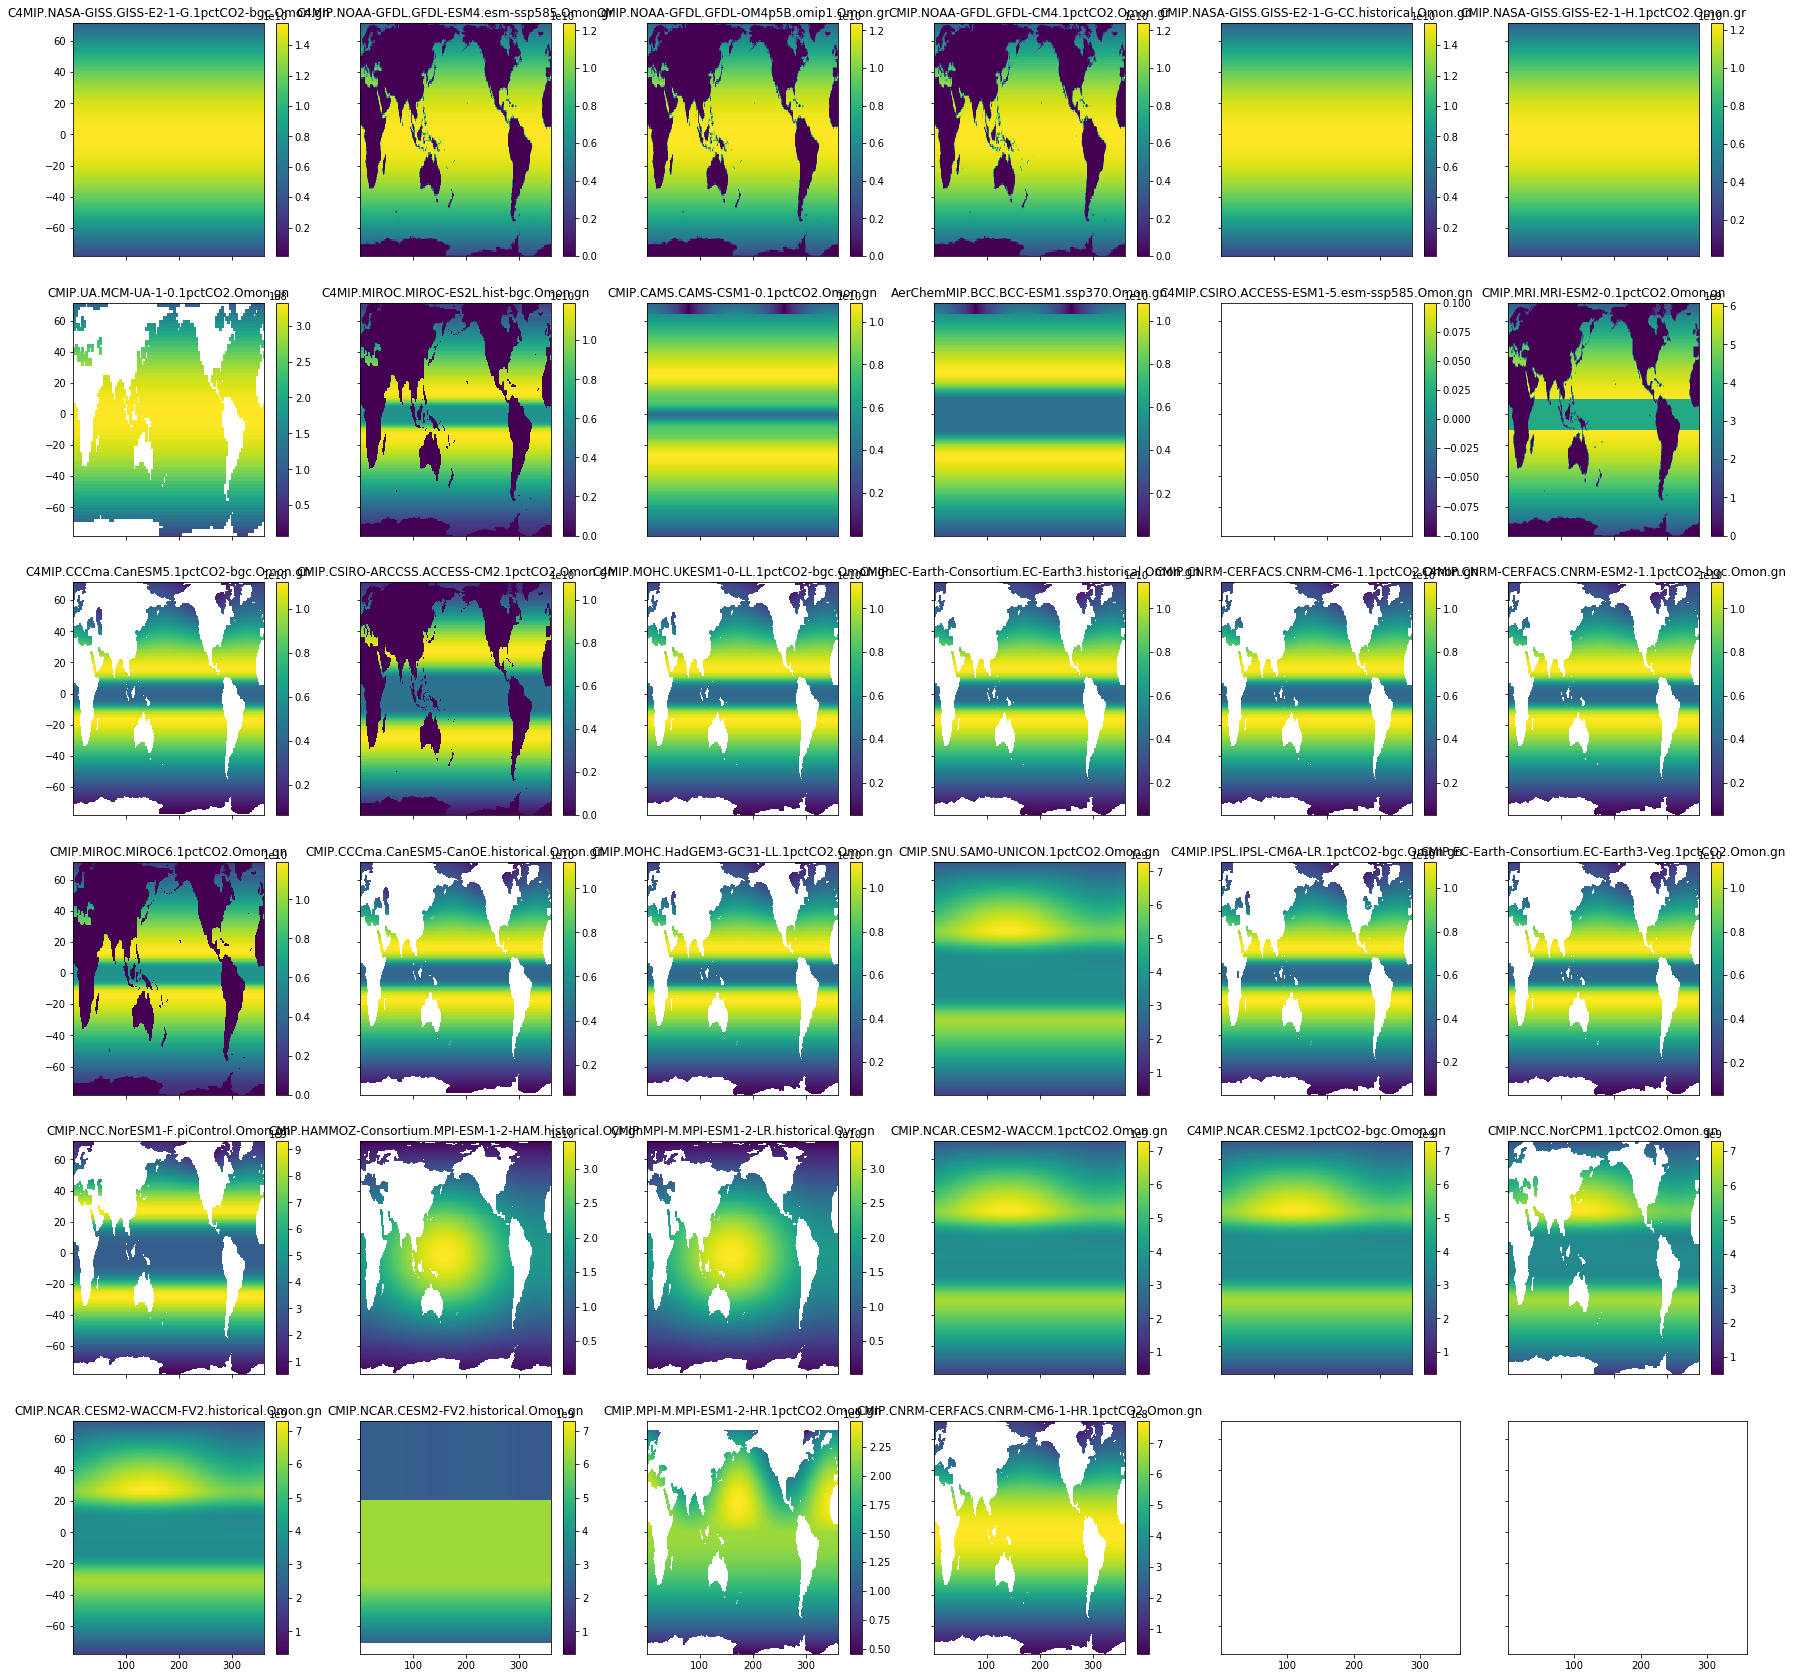

In [35]:
import matplotlib.pyplot as plt
fig, axarr = plt.subplots(ncols=6, nrows=len(data_dict.keys())//6 +1, figsize=[30,30], sharex=True, sharey=True)
for ax, (k, ds) in zip(axarr.flat, data_dict.items()):
    ds.areacello.plot(ax=ax, add_labels=False)
    ax.set_title(k)

Seems like the CSIRO model is the only one with this problem. Also WTF is going on in the CESM2-FV2?

This would be nice for the docs...